Technical Report: Building and Tuning Classification Models for Happiness Prediction

Introduction

In this technical report, we will walk through the process of building and tuning classification models for the task of predicting happiness levels based on a dataset called 'ACME-HappinessSurvey2020.csv'. We will use Python's Scikit-Learn library for machine learning and several classification algorithms to achieve this. The primary goal is to select the best-performing model for predicting happiness levels.

Libraries Used
Pandas: Used for data loading and manipulation.
Scikit-Learn: Used for machine learning tasks such as model selection, preprocessing, and evaluation.
XGBoost: An optimized gradient boosting library.
Warning: Used to suppress warning messages.

Data Loading and Preprocessing

The initial steps involve loading the dataset and preparing the data for machine learning.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('ACME-HappinessSurvey2020.csv')

# Data Overview
print("Data Overview:")
print(df.head())

# Data Summary
print("\nData Summary:")
print(df.info())
print("\nStatistics for Numerical Features:")
print(df.describe())


Data Overview:
   Y  X1  X2  X3  X4  X5  X6
0  0   3   3   3   4   2   4
1  0   3   2   3   5   4   3
2  1   5   3   3   3   3   5
3  0   5   4   3   3   3   5
4  0   5   4   3   3   3   5

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB
None

Statistics for Numerical Features:
                Y          X1          X2          X3          X4          X5  \
count  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000   
mean     0.547619    4.333333    2.531746    3.309524    3.746032    3.650794   
std      0.499714    0.800000    1.114892    1.023440  

In [11]:
print("\nUnique Values in Categorical Features:")
categorical_features = df.columns
for feature in categorical_features:
    print(f"Feature: {feature}")
    print(df[feature].value_counts())


Unique Values in Categorical Features:
Feature: Y
Y
1    69
0    57
Name: count, dtype: int64
Feature: X1
X1
5    65
4    40
3    20
1     1
Name: count, dtype: int64
Feature: X2
X2
3    42
2    34
1    27
4    17
5     6
Name: count, dtype: int64
Feature: X3
X3
3    55
4    33
5    17
2    14
1     7
Name: count, dtype: int64
Feature: X4
X4
4    53
3    41
5    25
2     5
1     2
Name: count, dtype: int64
Feature: X5
X5
4    50
5    31
3    22
2    16
1     7
Name: count, dtype: int64
Feature: X6
X6
5    57
4    47
3    20
2     1
1     1
Name: count, dtype: int64


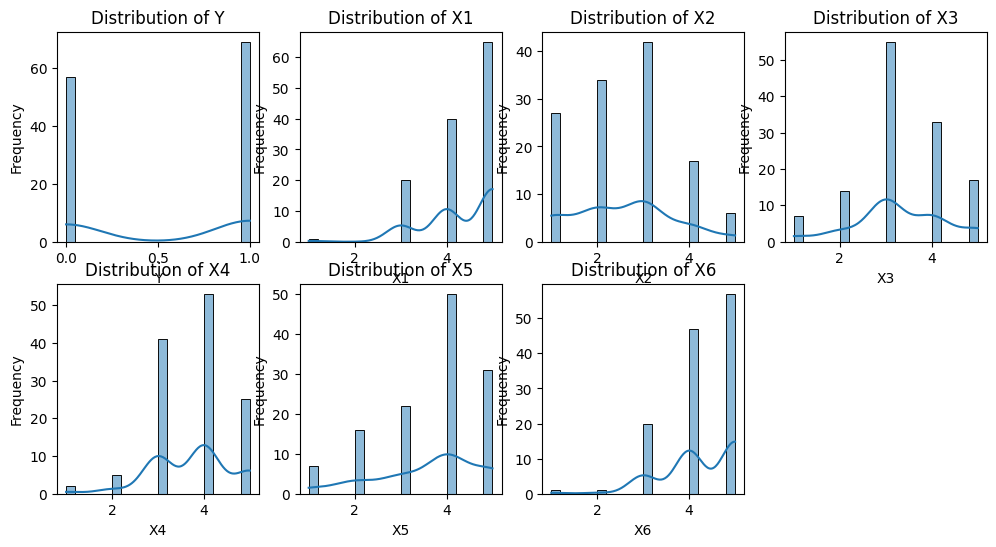

In [12]:
# Data Visualization
plt.figure(figsize=(12, 6))

# Histograms for Numerical Features
for feature in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.subplot(2, 4, df.columns.get_loc(feature)+1)
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')


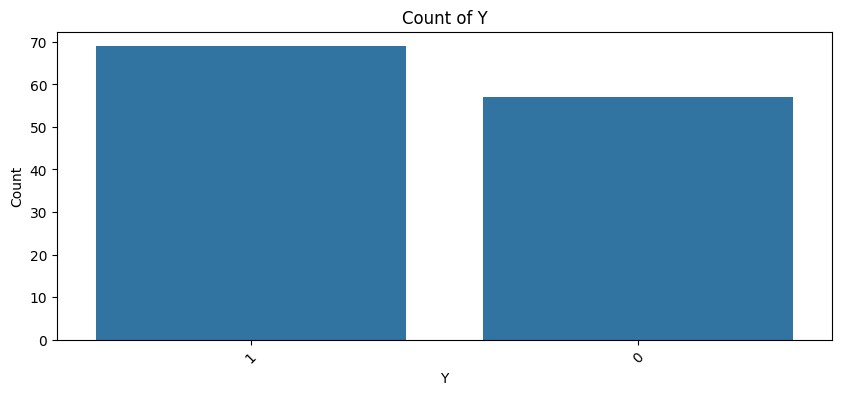

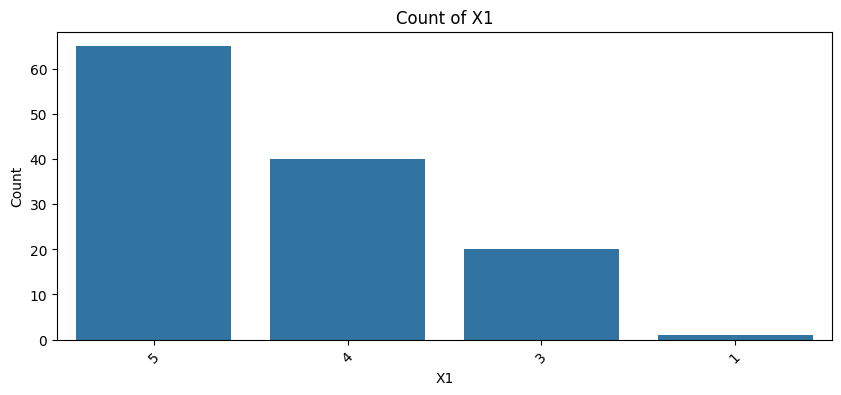

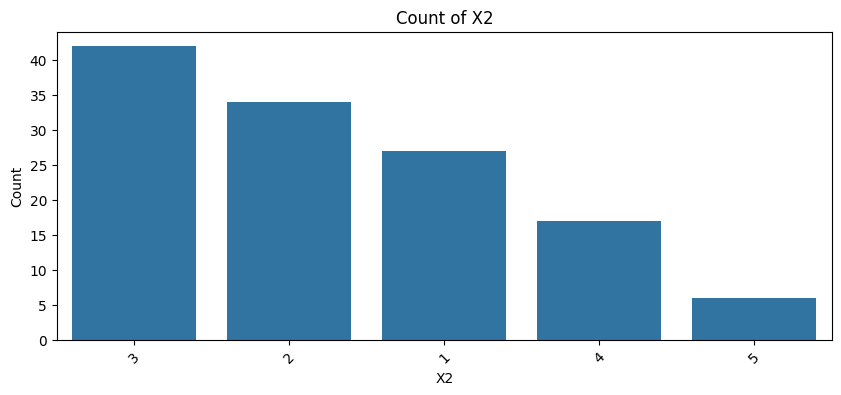

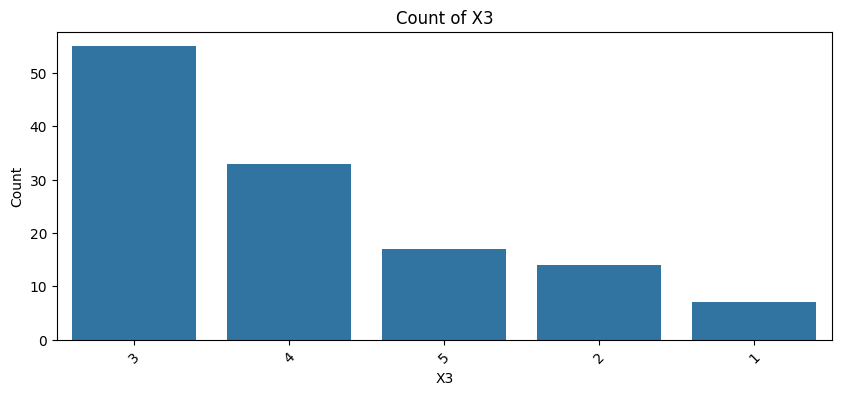

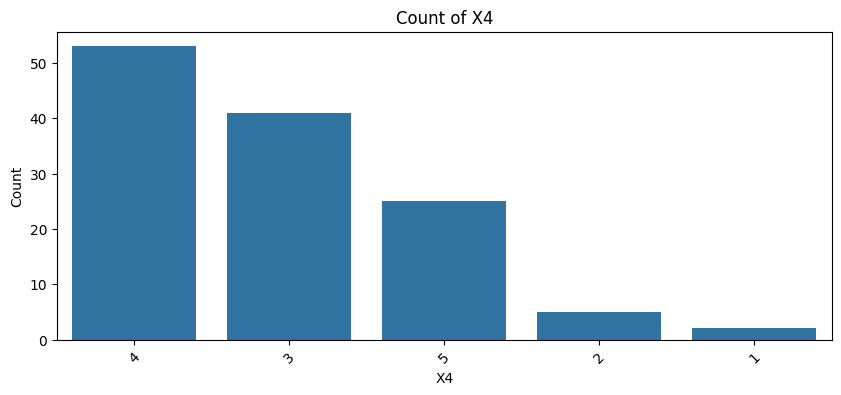

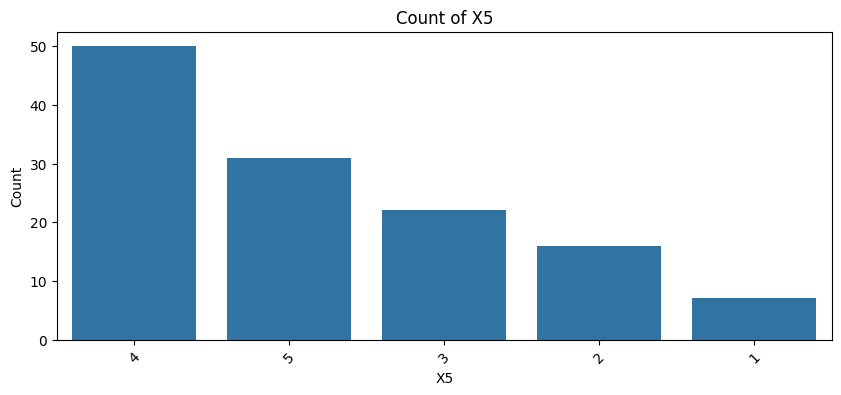

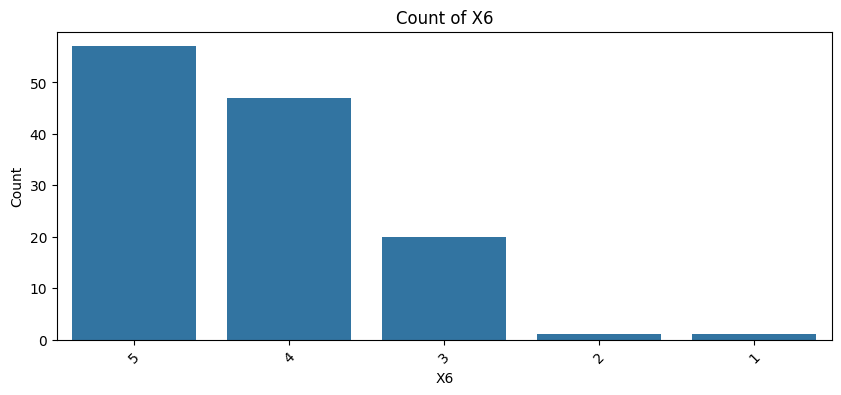

In [13]:
# Bar plots for Categorical Features
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

Text(0.5, 1.0, 'Correlation Matrix')

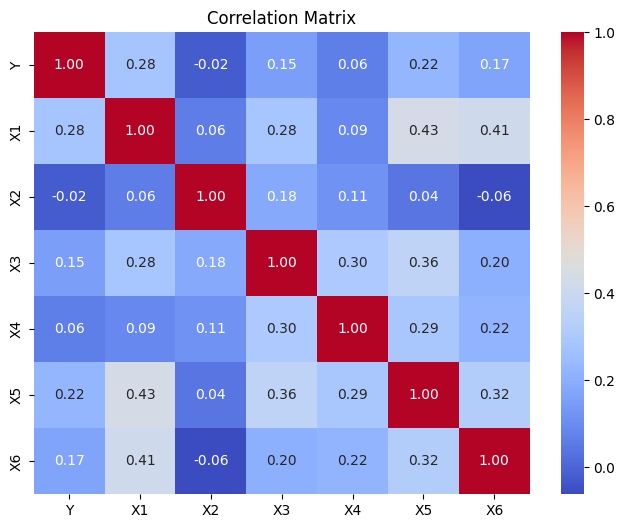

In [14]:
# Correlation Matrix for Numerical Features
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')


Text(0.5, 1.02, 'Pairplot for Relationships')

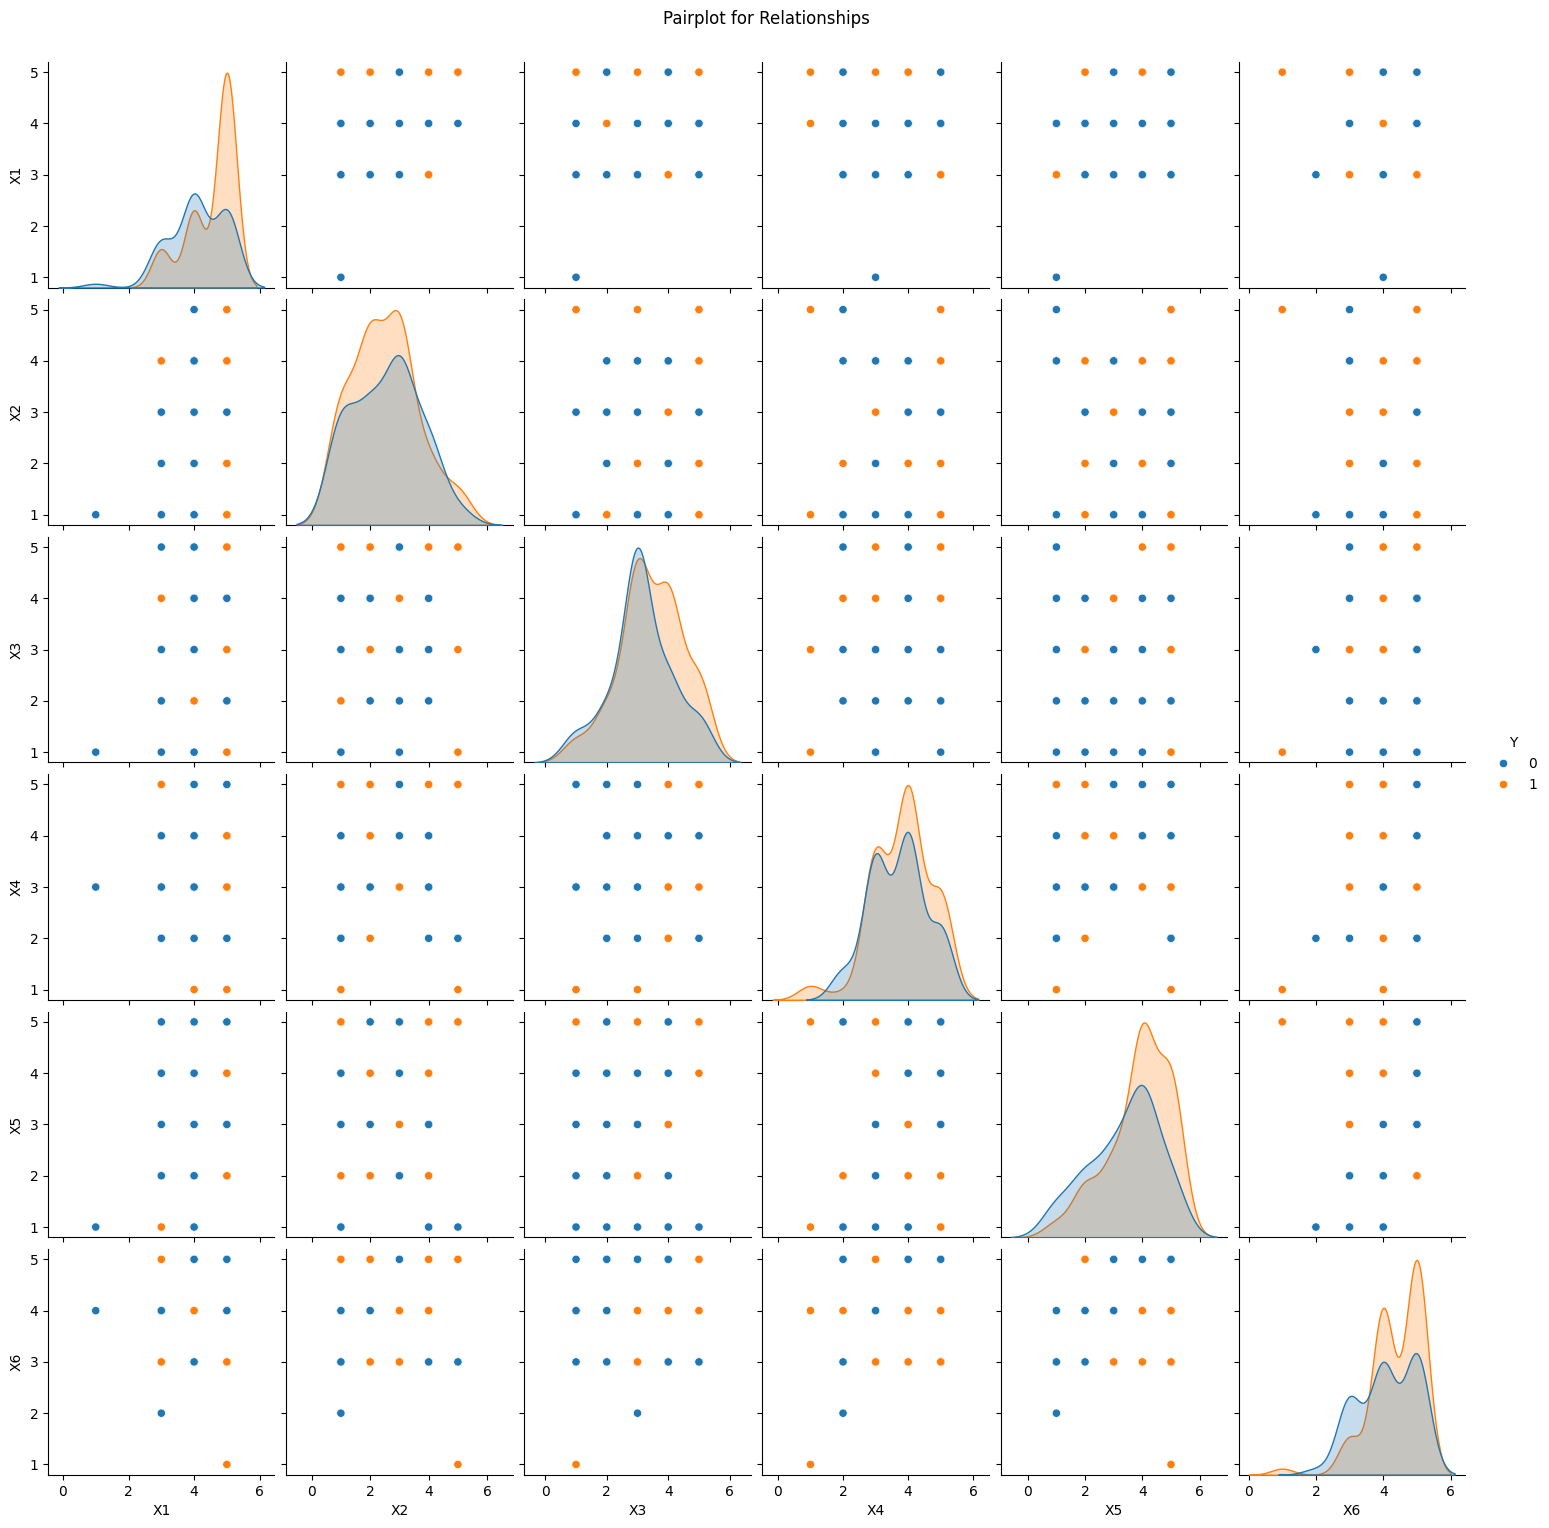

In [15]:
# Pairplot for Relationships
sns.pairplot(df, hue='Y', diag_kind='kde')
plt.suptitle('Pairplot for Relationships', y=1.02)

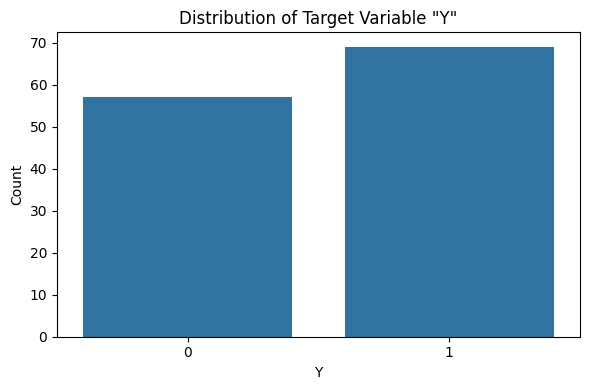

In [16]:
# Target Variable Analysis
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Y')
plt.title('Distribution of Target Variable "Y"')
plt.xlabel('Y')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [3]:
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Ignore warnings
warnings.filterwarnings("ignore")


# Loading data from CSV to df
df = pd.read_csv('ACME-HappinessSurvey2020.csv')  # If your data is in a CSV file

# Defining features and target
X = df.drop('Y', axis=1)
y = df['Y']
# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Create a stratified split to maintain the class distribution
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# split the data to train the final model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)



In [4]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)

param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
}

# GridSearchCV for parameter tuning
grid_search_lr = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid_lr,
    cv=stratified_kfold,
    verbose=1,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_lr.fit(X_scaled, y)

# Training the final Logistic Regression model on the full training set using the best parameters
best_lr_model = grid_search_lr.best_estimator_
best_lr_model.fit(X_train, y_train)

# Predicting on the test set with the best Logistic Regression model
y_pred_lr = best_lr_model.predict(X_test)

# Calculating the accuracy on the test set for Logistic Regression
test_accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy on the test set for Logistic Regression: {test_accuracy_lr}')


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Accuracy on the test set for Logistic Regression: 0.6153846153846154


In [5]:
# Support Vector Classifier (SVC)
svc_model = SVC(random_state=42)

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'] + [0.1, 0.2],
}

# GridSearchCV for parameter tuning
grid_search_svc = GridSearchCV(
    estimator=svc_model,
    param_grid=param_grid_svc,
    cv=stratified_kfold,
    verbose=1,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_svc.fit(X_scaled, y)

# Training the final SVC model on the full training set using the best parameters
best_svc_model = grid_search_svc.best_estimator_
best_svc_model.fit(X_train, y_train)

# Predicting on the test set with the best SVC model
y_pred_svc = best_svc_model.predict(X_test)

# Calculating the accuracy on the test set for SVC
test_accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Accuracy on the test set for SVC: {test_accuracy_svc}')


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Accuracy on the test set for SVC: 0.6538461538461539


In [6]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'subsample': [0.7, 0.8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# GridSearchCV for parameter tuning
grid_search_gb = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid_gb,
    cv=stratified_kfold,
    verbose=1,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_gb.fit(X_scaled, y)

# Training the final Gradient Boosting model on the full training set using the best parameters
best_gb_model = grid_search_gb.best_estimator_
best_gb_model.fit(X_train, y_train)

# Predicting on the test set with the best Gradient Boosting model
y_pred_gb = best_gb_model.predict(X_test)

# Calculating the accuracy on the test set for Gradient Boosting
test_accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy on the test set for Gradient Boosting: {test_accuracy_gb}')




Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Accuracy on the test set for Gradient Boosting: 0.46153846153846156


In [7]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}

# GridSearchCV for parameter tuning
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=stratified_kfold,
    verbose=1,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_rf.fit(X_scaled, y)

# Training the final Random Forest model on the full training set using the best parameters
best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)

# Predicting on the test set with the best Random Forest model
y_pred_rf = best_rf_model.predict(X_test)

# Calculating the accuracy on the test set for Random Forest
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy on the test set for Random Forest: {test_accuracy_rf}')


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Accuracy on the test set for Random Forest: 0.7307692307692307


Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Best parameters found:  {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.3, 'reg_lambda': 3, 'subsample': 0.8}
Best cross-validated accuracy found:  0.6196923076923078
Accuracy on the test set: 0.7692307692307693


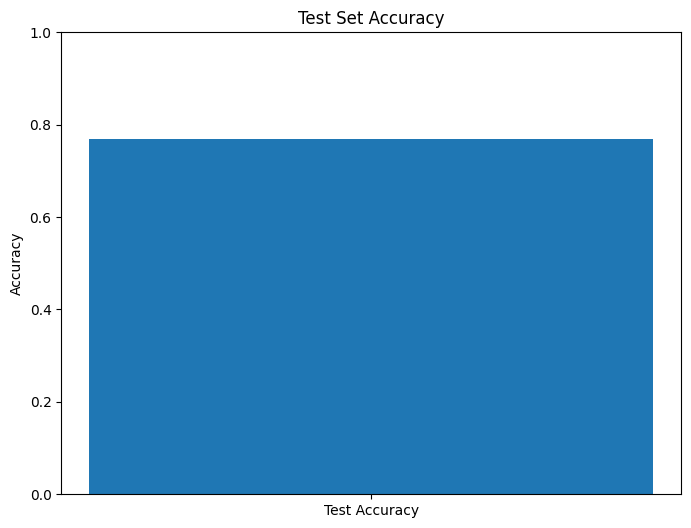

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import matplotlib.pyplot as plt



# Initialize the XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Create a parameter grid with narrowed focus and increased regularization
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'colsample_bytree': [0.7, 0.8],
    'subsample': [0.7, 0.8],
    'gamma': [0.1, 0.2],
    'reg_lambda': [1, 1.5, 2, 3],  # Increased regularization
    'reg_alpha': [0.1, 0.2, 0.3]
}

# Setup the GridSearchCV object with stratified K-Fold
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=stratified_kfold,
    verbose=1,
    scoring='accuracy',
    n_jobs=-1
)

# Performing the grid search
grid_search.fit(X_scaled, y)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated accuracy found: ", grid_search.best_score_)


# Training the final model on the full training set using the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predicting on the test set with the best parameters
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {test_accuracy}')

# Plot the accuracies
plt.figure(figsize=(8, 6))
plt.bar(['Test Accuracy'], [test_accuracy])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Test Set Accuracy')
plt.show()


Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Best parameters found for XGBClassifier:  {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.3, 'reg_lambda': 3, 'subsample': 0.8}
Best cross-validated accuracy found for XGBClassifier:  0.6196923076923078
Accuracy on the test set for XGBClassifier: 0.7692307692307693
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters found for RandomForestClassifier:  {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validated accuracy found for RandomForestClassifier:  0.689846153846154
Accuracy on the test set for RandomForestClassifier: 0.7307692307692307
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found for GradientBoostingClassifier:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100,

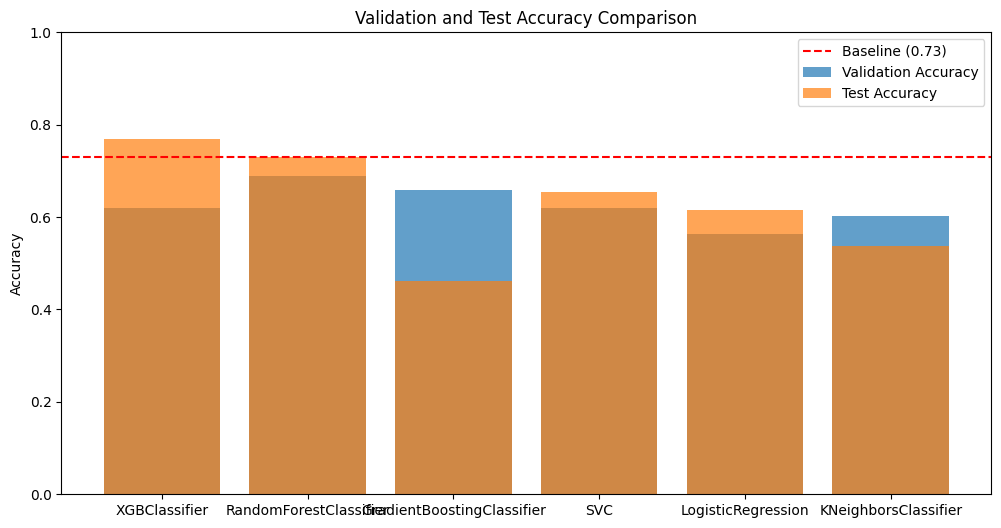

In [9]:
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Ignore warnings
warnings.filterwarnings("ignore")


# Loading data from CSV to df
df = pd.read_csv('ACME-HappinessSurvey2020.csv')  # If your data is in a CSV file

# Defining features and target
X = df.drop('Y', axis=1)
y = df['Y']
# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# spliting the data to train the final model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


# Create a stratified split to maintain the class distribution
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the models
models = [
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    SVC(random_state=42),
    LogisticRegression(random_state=42),
    KNeighborsClassifier()
]

# Create a parameter grid for each model
param_grids = [
    {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 4],
        'colsample_bytree': [0.7, 0.8],
        'subsample': [0.7, 0.8],
        'gamma': [0.1, 0.2],
        'reg_lambda': [1, 1.5, 2, 3],  # Increased regularization
        'reg_alpha': [0.1, 0.2, 0.3]
    },
    {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 4, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt'],
    },
    {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 4],
        'subsample': [0.7, 0.8],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    },
    {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto'] + [0.1, 0.2],
    },
    {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10],
    },
    {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
    }
]

# Initialize lists to store validation and test accuracies for each model
validation_accuracies = []
test_accuracies = []

for model, param_grid in zip(models, param_grids):
    # Setting up the GridSearchCV object with stratified K-Fold for the current model
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=stratified_kfold,
        verbose=1,
        scoring='accuracy',
        n_jobs=-1
    )

    # Performing the grid search
    grid_search.fit(X_scaled, y)

    # Best parameters and best score
    print(f"Best parameters found for {model.__class__.__name__}: ", grid_search.best_params_)
    print(f"Best cross-validated accuracy found for {model.__class__.__name__}: ", grid_search.best_score_)

   
    # Training the final model on the full training set using the best parameters
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)

    # Predicting on the test set with the best parameters
    y_pred = best_model.predict(X_test)

    # Calculating  the accuracy on the test set
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy on the test set for {model.__class__.__name__}: {test_accuracy}')
    
    # Store validation and test accuracies
    validation_accuracies.append(grid_search.best_score_)
    test_accuracies.append(test_accuracy)

# Plotting the accuracies
plt.figure(figsize=(12, 6))
models_names = [model.__class__.__name__ for model in models]
plt.bar(models_names, validation_accuracies, label='Validation Accuracy', alpha=0.7)
plt.bar(models_names, test_accuracies, label='Test Accuracy', alpha=0.7)
plt.axhline(y=0.73, color='red', linestyle='--', label='Baseline (0.73)')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Validation and Test Accuracy Comparison')
plt.legend()
plt.show()
